# ByteTrack Testing

## Install YOLOv5 <a class="anchor" id="install-yolov5"></a>

In [14]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


### Use pre-trained COCO model - full video

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source {HOME}/clips/08fd33_4.mp4 --name coco

In [10]:
# %cd {HOME}/yolov5
# !python detect.py --weights yolov5x6.pt --img 1280 --conf 0.25 --source {HOME}/clips/08fd33_4.mp4 --name coco

### Use custom model - single frame

In [4]:
from typing import Generator
import os
import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline
trackdict = []


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)
    video.open(video_file)
    #print(video.isOpened())
    while video.isOpened():
        success, frame = video.read()

        if not success:
            print("unsucessful")
            break
        yield frame  
    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

## Install ByteTrack and other libs<a class="anchor" id="install-bytetrack"></a>

ByteTrack is great tracker but a bit poorly packaged. We need to jump through some fire hoops to make it work in tandem with YOLOv5.  

In [3]:
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop

fatal: destination path 'ByteTrack' already exists and is not an empty directory.


  Using cached ninja-1.11.1-py2.py3-none-win_amd64.whl (313 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached motmetrics-1.4.0-py3-none-any.whl (161 kB)
  Using cached filterpy-1.4.5-py3-none-any.whl
  Using cached onnx-1.8.1.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached onnxruntime-1.8.0-cp39-cp39-win_amd64.whl (4.7 MB)
  Using cached onnx_simplifier-0.3.5-py3-none-any.whl
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached onnxoptimizer-0.3.13-cp39-cp39-win_amd64.whl (381 kB)
  Using cached google_auth-2.19.1-py2.py

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [115 lines of output]
  fatal: not a git repository (or any of the parent directories): .git
  C:\Users\andyl\AppData\Local\Temp\pip-build-env-p7t797fk\overlay\Lib\site-packages\setuptools\dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'license-file' will not be supported in future
          versions. Please use the underscore name 'license_file' instead.
  
          By 2023-Sep-26, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, section)
  C:\Users\andyl\AppData\Lo

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [5]:
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("/Users/andyl/deep-person-reid/ByteTrack_ReID-master/")
sys.path.append("/Users/andyl/deep-person-reid/ByteTrack_ReID-master/src/cython_bbox")
sys.path.append("/Users/andyl/deep-person-reid/ByteTrack_ReID-master/protobuf")

In [6]:
!pip install onemetric --quiet

In [7]:
#!pip install cython_bbox

In [8]:
from dataclasses import dataclass
train1 = "/Users/andyl/Documents/EE443_track1/c071/video.mp4"
train2 = "c072/video.mp4"
train3 = "c073/video.mp4"
val = "/Users/andyl/Documents/EE443_track1/c074/video.mp4"
test = "/Users/andyl/Videos/Vibration Detection v2.mp4"
@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [9]:
!cd /Users/andyl/deep-person-reid/ByteTrack/
!cd /Users/andyl/deep-person-reid/ByteTrack_ReID-master/ && python setup.py develop
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch

C:\Users\andyl\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\andyl\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\andyl\anaconda3\lib\site-packages\torch\utils\cpp_extension.py:476: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
C:\Users\andyl\anaconda3\lib\site-packages\torch\utils\cpp_extension.py:359: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')


running develop
running egg_info
writing yolox.egg-info\PKG-INFO
writing dependency_links to yolox.egg-info\dependency_links.txt
writing top-level names to yolox.egg-info\top_level.txt
reading manifest file 'yolox.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'yolox.egg-info\SOURCES.txt'
running build_ext
copying build\lib.win-amd64-cpython-39\yolox\_C.cp39-win_amd64.pyd -> yolox
Creating c:\users\andyl\anaconda3\lib\site-packages\yolox.egg-link (link to .)
yolox 0.1.0 is already the active version in easy-install.pth

Installed c:\users\andyl\deep-person-reid\bytetrack_reid-master
Processing dependencies for yolox==0.1.0
Finished processing dependencies for yolox==0.1.0


## Custom annotator <a class="anchor" id="custom-annotator"></a>

In [10]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

import cv2

import numpy as np


# geometry utilities


@dataclass(frozen=True)
class Point:
    x: float
    y: float
    
    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)


@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x
    
    @property
    def min_y(self) -> float:
        return self.y
    
    @property
    def max_x(self) -> float:
        return self.x + self.width
    
    @property
    def max_y(self) -> float:
        return self.y + self.height
        
    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)
    
    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding, 
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )
    
    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


# detection utilities


@dataclass
class Detection:
    rect: Rect
    camera_id: int
    frame_id: int
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        result = []
        for camera_id, frame_id, class_id, x_min, y_min, x_max, y_max, confidence in pred:
            camera_id=int(camera_id)
            frame_id=int(frame_id)
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                camera_id=camera_id,
                frame_id=frame_id,
                class_name=names[1],
                confidence=float(confidence)
            ))
        return result


def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection 
        in detections
        if detection.class_name == class_name
    ]


# draw utilities


@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int
        
    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)


def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
    return image


def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


# base annotator
  

@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            #print(detection.class_id)
            annotated_image = draw_rect(
                image=image,
                rect=detection.rect,
                color= Color.from_hex_string('#FFFFFF'),
                thickness=self.thickness
            )
        return annotated_image

In [11]:
# white
BALL_COLOR_HEX = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALL_COLOR_HEX)

# red
GOALKEEPER_COLOR_HEX = "#850101"
GOALKEEPER_COLOR = Color.from_hex_string(GOALKEEPER_COLOR_HEX)

# green
PLAYER_COLOR_HEX = "#00D4BB"
PLAYER_COLOR = Color.from_hex_string(PLAYER_COLOR_HEX)

# yellow
REFEREE_COLOR_HEX = "#FFFF00"
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 4

In [12]:
# get fresh video frame generator
%cd /Users/andyl/Documents/EE443_track1
frame_iterator = iter(generate_frames(video_file=val))
cv2.__version__
detection = np.loadtxt('detection.txt',delimiter=',',dtype=None)
embedding = np.load('embedding.npy', allow_pickle=True)
tinds = detection[:,0] == 71
train_detection = detection[tinds]
sort_tinds = train_detection[:, 1].argsort()
train_detection = train_detection[sort_tinds]
vinds = detection[:,0] == 74
val_detection = detection[vinds]
val_embedding = embedding[vinds]
sort_vinds = val_detection[:, 1].argsort()
val_detection = val_detection[sort_vinds]
val_embedding = val_embedding[sort_vinds]
classdict = {1: "blue-guy", 2:"purple-guy", 3:"white-guy", 4:"meh-guy", 5: "meh-guy2", 6: "meh-guy3", 7:"meh-guy4", 8:"meh-guy5", 9: "collision1"}

C:\Users\andyl\Documents\EE443_track1


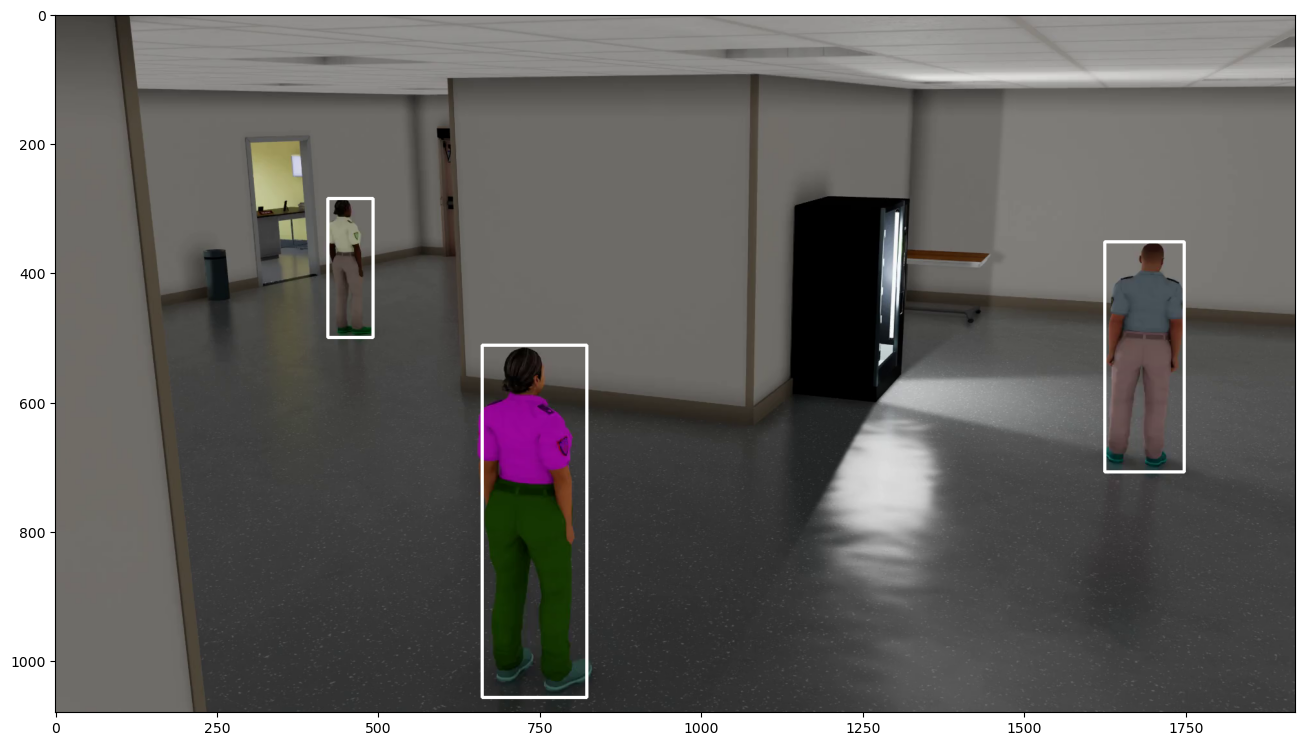

In [12]:
# initiate annotators
annotator = BaseAnnotator(
    colors=COLORS, 
    thickness=THICKNESS)

# acquire video frame
frame = next(frame_iterator)

# run detector
#note that track_id is assigned randomly; class-labeled for posterity
detections = Detection.from_results(
    pred=val_detection[0:3,:],
    names=classdict)

# annotate video frame
annotated_image = annotator.annotate(
    image=frame, 
    detections=detections)

# plot video frame
plot_image(annotated_image, 16)

## Detect ball possession <a class="anchor" id="detect-ball-possession"></a>


We want to mark current ball location as well as player currently in possession with small triangle markers. 

### Utils

In [13]:
from typing import List

import numpy as np


# calculates coordinates of possession marker
def calculate_marker(anchor: Point) -> np.ndarray:
    x, y = anchor.int_xy_tuple
    return(np.array([
        [x - MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN],
        [x, y - MARKER_MARGIN],
        [x + MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN]
    ]))


# draw single possession marker
def draw_marker(image: np.ndarray, anchor: Point, color: Color) -> np.ndarray:
    possession_marker_countour = calculate_marker(anchor=anchor)
    image = draw_filled_polygon(
        image=image, 
        countour=possession_marker_countour, 
        color=color)
    image = draw_polygon(
        image=image, 
        countour=possession_marker_countour, 
        color=MARKER_CONTOUR_COLOR,
        thickness=MARKER_CONTOUR_THICKNESS)
    return image


# dedicated annotator to draw possession markers on video frames
@dataclass
class MarkerAnntator:

    color: Color

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_marker(
                image=image, 
                anchor=detection.rect.top_center,
                color=self.color)
        return annotated_image

### Single frame

### Full video

In [2]:
# settings
#SOURCE_VIDEO_PATH = f"{HOME}/clips/08fd33_4.mp4"
#TARGET_VIDEO_PATH = f"{HOME}/ball-possession/8fd33_4.mp4"

In [14]:
from dataclasses import dataclass

import cv2


"""
usage example:

video_config = VideoConfig(
    fps=30, 
    width=1920, 
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH, 
    video_config=video_config)

for frame in frames:
    ...
    video_writer.write(frame)
    
video_writer.release()
"""


# stores information about output video file, width and height of the frame must be equal to input video
@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int
        

# create cv2.VideoWriter object that we can use to save output video
def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path, 
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"), 
        fps=video_config.fps, 
        frameSize=(video_config.width, video_config.height), 
        isColor=True
    )

## Full video tracking <a class="anchor" id="full-video-tracking"></a>

In [15]:
from typing import List

import numpy as np

"""
BYTETracker does not assign tracker_id to existing bounding boxes but rather
predicts the next bounding box position based on previous one. Therefore, we 
need to find a way to match our bounding boxes with predictions.

usage example:

byte_tracker = BYTETracker(BYTETrackerArgs())
for frame in frames:
    ...
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(), 
        names=model.names)
    ...
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=detections),
        img_info=frame.shape,
        img_size=frame.shape)
    detections = match_detections_with_tracks(detections=detections, tracks=tracks)
"""

# converts List[Detection] into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ], dtype=float)


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: List[Detection], 
    tracks: List[STrack]
) -> List[Detection]:
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections

In [25]:
# text annotator to display tracker_id
@dataclass
class TextAnnotator:
    background_color: Color
    text_color: Color
    text_thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # if tracker_id is not assigned skip annotation
            if detection.tracker_id is None:
                continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.class_id), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.7, 
                thickness=self.text_thickness)
            width, height = size
            
            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10
            with open('results.txt', 'a') as f:
                f.write("x: " + str(x) + ", y: " + str(y) + ", track_id: " + str(detection.class_id) + 
                        ", frame_id: " + str(detection.frame_id) + ", camera_id: " + str(detection.camera_id))
                f.write('\n')
            
            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image, 
                rect=Rect(x=x, y=y-50, width=width, height=height).pad(padding=5), 
                color=self.background_color)
            # draw text
            annotated_image = draw_text(
                image=annotated_image, 
                anchor=Point(x=x, y=y-50 + height), 
                text=str(detection.class_id), 
                color=self.text_color, 
                thickness=self.text_thickness)
            annotated_image = draw_text(
                image=annotated_image, 
                anchor=Point(x=100, y=100 + height), 
                text=str(detection.camera_id), 
                color=self.text_color, 
                thickness=self.text_thickness)
            annotated_image = draw_text(
                image=annotated_image, 
                anchor=Point(x=100, y=150 + height), 
                text=str(detection.frame_id), 
                color=self.text_color, 
                thickness=self.text_thickness)
        return annotated_image

## Put everything together <a class="anchor" id="put-everything-together"></a>

In [17]:
test = "/Users/andyl/Documents/EE443_track1/c075/video.mp4"
TARGET_VIDEO_PATH = "/Users/andyl/Documents/EE443_track1/testtracking2.mp4"
inds = detection[:,0] == 75 # test set
test_detection = detection[inds]
test_embedding = embedding[inds]
sort_inds = test_detection[:, 1].argsort()
test_detection = test_detection[sort_inds]
test_embedding = test_embedding[sort_inds]

In [26]:
from tqdm.notebook import tqdm
from PIL import Image
from scipy.spatial import distance

# initiate video writer
video_config = VideoConfig(
    fps=30, 
    width=1920, 
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH, 
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(generate_frames(video_file=test))

# initiate annotators
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ], 
    thickness=THICKNESS)

trackid_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)

# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs())

framecount = 0
trackdict = []

resulthold = []
# loop over frames
for frame in tqdm(frame_iterator, total=750):
    tinds = test_detection[:,1] == framecount
    test_detect_temp = test_detection[tinds]
    test_embd_temp = test_embedding[tinds]
    tinds = test_detect_temp[:,7] >= 0.5 #detections must have confidence of 50% or higher.
    test_detect_temp = test_detect_temp[tinds]
    test_embd_temp = test_embd_temp[tinds]
    sort_tinds = test_detect_temp[:, 1].argsort()
    test_detect_temp = test_detect_temp[sort_tinds]
    test_embd_temp = test_embd_temp[sort_tinds]
    #vinds = val_detection[:,1] == framecount
    #val_detect_temp = val_detection[vinds]
    #sort_vinds = val_detect_temp[:, 1].argsort()
    #val_detect_temp = val_detect_temp[sort_vinds]
    # run detector
    if framecount == 0:
        for i in test_embd_temp:
            trackdict.append(i)
    else:
        i = 0
        for dis1 in test_embd_temp:
            found = False
            b = 0
            for dis2 in trackdict:
                b += 1
                if distance.cosine(dis1, dis2) < 0.5:
                    found = True
                    test_detect_temp[i, 2] = b
            if found == False:
                trackdict.append(dis1)
                b += 1
                test_detect_temp[i, 2] = b
            i += 1
    detections = Detection.from_results(
        pred=test_detect_temp[:, :], 
        names=classdict)

    tracked_detections = detections
    # annotate video frame
    try:
        tracks = byte_tracker.update(output_results=detections2boxes(detections=tracked_detections),
            img_info=frame.shape,
            img_size=frame.shape,
            id_feature = test_embd_temp
        )
        tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)
        
        annotated_image = frame.copy()
        annotated_image = base_annotator.annotate(
            image=annotated_image, 
            detections=tracked_detections)
        annotated_image = trackid_text_annotator.annotate(
            image=annotated_image, 
            detections=tracked_detections)
        video_writer.write(annotated_image)
        framecount += 1
    except IndexError or ValueError:
        annotated_image = frame.copy()
        video_writer.write(annotated_image)
        framecount += 1
        continue
    if framecount == 10000:
        break
    
    # save video frame

# close output video
video_writer.release()

  0%|          | 0/750 [00:00<?, ?it/s]